In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Task 1: Data Exploration

## Load the dataset

In [7]:
file_path = "/content/dataset.csv"
df = pd.read_csv('1Dec to 3Jan Consultations.csv', on_bad_lines='skip')

In [8]:
# Display 10 rows
df.head(10)

,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,...,feedback,hideHistory,cardPosition,Remedies,offer,refunds[0],source,callSeconds,complementaryCallOrganiser,disconnectedBy
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,65692edb919324acb6e885d1,656890c8919324acb6df2bc8,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,29966,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,65693157919324acb6e888c3,6569313c919324acb6e88758,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30131,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,656931d2919324acb6e889af,656931be919324acb6e8896c,NaN,652863242c4f29e6d54f42c5,Astro Rajesh S,241,30132,Call,app,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,65693354919324acb6e88ed7,65693346919324acb6e88d82,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30133,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,656934bc919324acb6e89306,6567adc8919324acb6a3be01,NaN,65054788f5f203225bfcdd5b,Astro Prashant,178,29614,Call,app,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(28027, 45)

## Checking  missing data

In [10]:
df.isnull().sum()

_id                               0
user                              0
chatStatus                     8512
guru                              0
guruName                          0
gid                               0
uid                               0
consultationType                  0
website                           0
refundStatus                      0
isWhiteListUser                   0
chatSeconds                    8513
queue                             0
freeCall                          0
freeChat                          0
createdAt                         0
updatedAt                         0
__v                               0
statementEntryId                151
chatStartTime                 18697
chatEndTime                   14996
timeDuration                   6629
callChannel                   19519
callIvrType                   19665
callStatus                    19486
CallSid                       19662
amount                        19011
astrologerCallStatus        

In [11]:
# Handle missing values
df['chatSeconds'].fillna(df['chatSeconds'].mean(), inplace=True)
df['timeDuration'].fillna(df['timeDuration'].mean(), inplace=True)
df['amount'].fillna(df['amount'].mean(), inplace=True)
df['astrologerOnCallDuration'].fillna(df['astrologerOnCallDuration'].mean(), inplace=True)
df['userOnCallDuration'].fillna(df['userOnCallDuration'].mean(), inplace=True)

## Summary statistics for key numeric columns

In [12]:
key_numeric_columns = ['chatSeconds', 'timeDuration', 'amount', 'astrologerOnCallDuration', 'userOnCallDuration']
df[key_numeric_columns].describe()

,chatSeconds,timeDuration,amount,astrologerOnCallDuration,userOnCallDuration
count,28027.000000,28027.000000,28027.000000,28027.000000,28027.000000
mean,349.158553,1.977168,23.742890,128.791871,118.784818
std,266.668806,2.918791,49.419112,133.953529,133.588681
min,300.000000,-0.166667,0.000000,0.000000,0.000000
25%,300.000000,0.000000,7.250000,128.791871,118.784818
50%,300.000000,1.977168,23.742890,128.791871,118.784818
75%,349.158553,3.000000,23.742890,128.791871,118.784818
max,7980.000000,67.000000,1800.000000,4029.000000,4020.000000


## Visualizing  the distribution of call charges

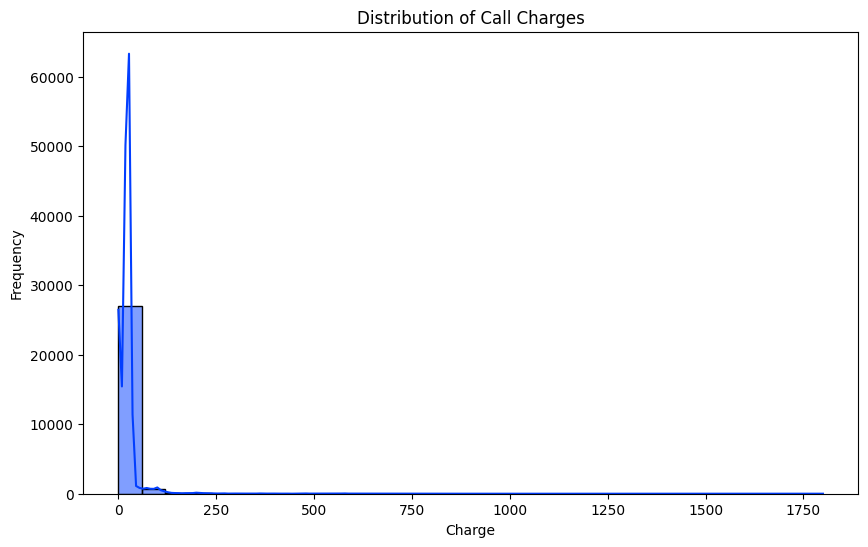

In [13]:
plt.figure(figsize=(10, 6))
sns.set_palette("bright")
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Distribution of Call Charges')
plt.xlabel('Charge')
plt.ylabel('Frequency')
plt.show()

# Task 2: Call Center Performance Metrics

## Average TalkTime for different call activities

In [14]:
avg_talk_time = df.groupby('consultationType')['timeDuration'].mean()
print(avg_talk_time)

consultationType
Call                1.978993
Chat                1.976006
Complementary       5.000000
public_live_Call    2.345623
Name: timeDuration, dtype: float64


## Most common source of calls

In [15]:
common_source = df['website'].mode()[0]
print(common_source)

gurucool


## Total earnings and spending for users and masters

In [16]:
total_earnings_users = df['userOnCallDuration'].sum()
total_spending_users = df['amount'].sum()
total_earnings_masters = df['astrologerOnCallDuration'].sum()
total_spending_masters = df['astrologersEarnings'].sum()

print(f'Total Earnings (Users): {total_earnings_users}')
print(f'Total Spending (Users): {total_spending_users}')
print(f'Total Earnings (Masters): {total_earnings_masters}')
print(f'Total Spending (Masters): {total_spending_masters}')

Total Earnings (Users): 3329182.085475195
Total Spending (Users): 665441.9855734989
Total Earnings (Masters): 3609649.7654512846
Total Spending (Masters): 99146.57095000001


## Relationship between TalkTime and Charge

In [17]:
correlation = df['timeDuration'].corr(df['amount'])
print(f'Correlation between TalkTime and Charge: {correlation}')

Correlation between TalkTime and Charge: 0.469598221388376


# Task 3: Call Handling Analysis

## Calculate the average time it takes for calls to be connected

In [18]:
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['updatedAt'] = pd.to_datetime(df['updatedAt'])
df['ConnectDelay'] = (df['updatedAt'] - df['createdAt']).dt.total_seconds()

avg_connect_delay = df['ConnectDelay'].mean()
print(f'Average Connect Delay: {avg_connect_delay} seconds')


Average Connect Delay: 3404.6974919185072 seconds


## Identifying the most common reason for call disconnection

In [19]:
common_disconnect_reason = df['callStatus'].value_counts()
print(f'Most Common Disconnect Reason: {common_disconnect_reason}')

Most Common Disconnect Reason: callStatus
completed     3453
no-answer     1729
busy          1270
failed        1214
incomplete     875
Name: count, dtype: int64


## Analyze the HangUpTime patterns

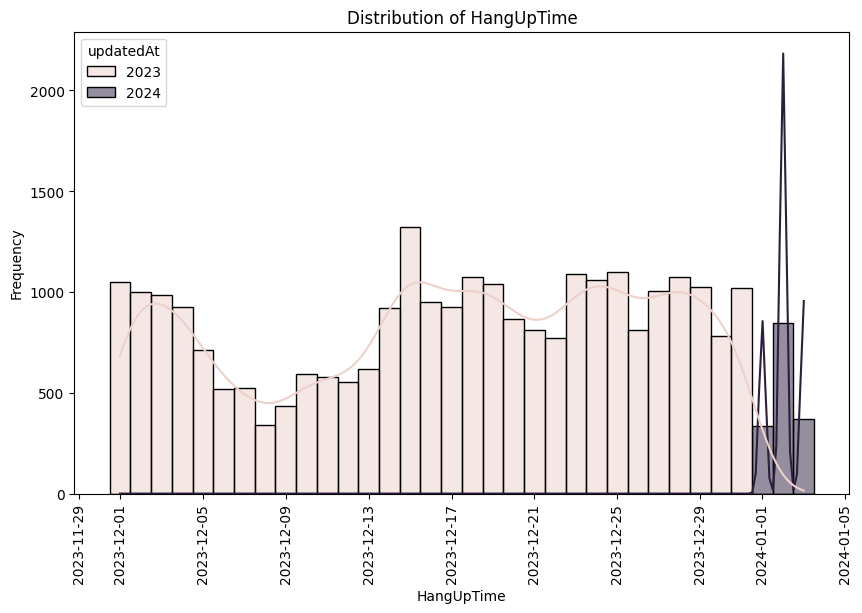

In [20]:
plt.figure(figsize=(10, 6))
sns.set_palette("bright")
sns.histplot(x=pd.to_datetime(df['updatedAt']).dt.date, bins=30, kde=True, hue=pd.to_datetime(df['updatedAt']).dt.year)
plt.xticks(rotation=90)
plt.title('Distribution of HangUpTime')
plt.xlabel('HangUpTime')
plt.ylabel('Frequency')
plt.show()

# Task 4: Order and Refund Analysis

## Determine the order status distribution for calls

In [21]:
order_status_dist = df['refundStatus'].value_counts()
print(order_status_dist)

refundStatus
no-refund     28022
Approved          3
Rejected          1
Processing        1
Name: count, dtype: int64


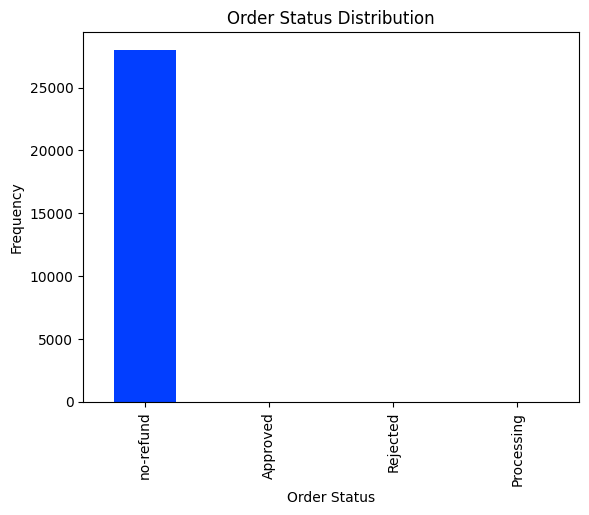

In [22]:
df['refundStatus'].value_counts().plot(kind='bar')
plt.xlabel('Order Status')
plt.ylabel('Frequency')
plt.title('Order Status Distribution')
plt.show()

## Calculate the total refund amount and identify the refund status distribution

In [23]:
total_refund_amount = df['amount'].sum()
refund_status_dist = df['refundStatus'].value_counts()

print(f'Total Refund Amount: {total_refund_amount}')
print(refund_status_dist)


Total Refund Amount: 665441.9855734989
refundStatus
no-refund     28022
Approved          3
Rejected          1
Processing        1
Name: count, dtype: int64


# Task 5: Insights and Recommendations



*   **Insight**: The correlation between TalkTime and Charge can indicate if longer calls lead to higher charges.
*   **Recommendation**: If the average connect delay is high, implement strategies to reduce it, such as improving call routing or agent training.


*  **Insight**: If users' spending is significantly higher than their earnings, consider revising pricing strategies or providing better value propositions.
*  **Recommendation**: Monitor common disconnect reasons and address any technical or process issues contributing to call drops.


# Task 6: Data Visualization

## Additional Visualizations

### Line chart showing trend in call charges over time

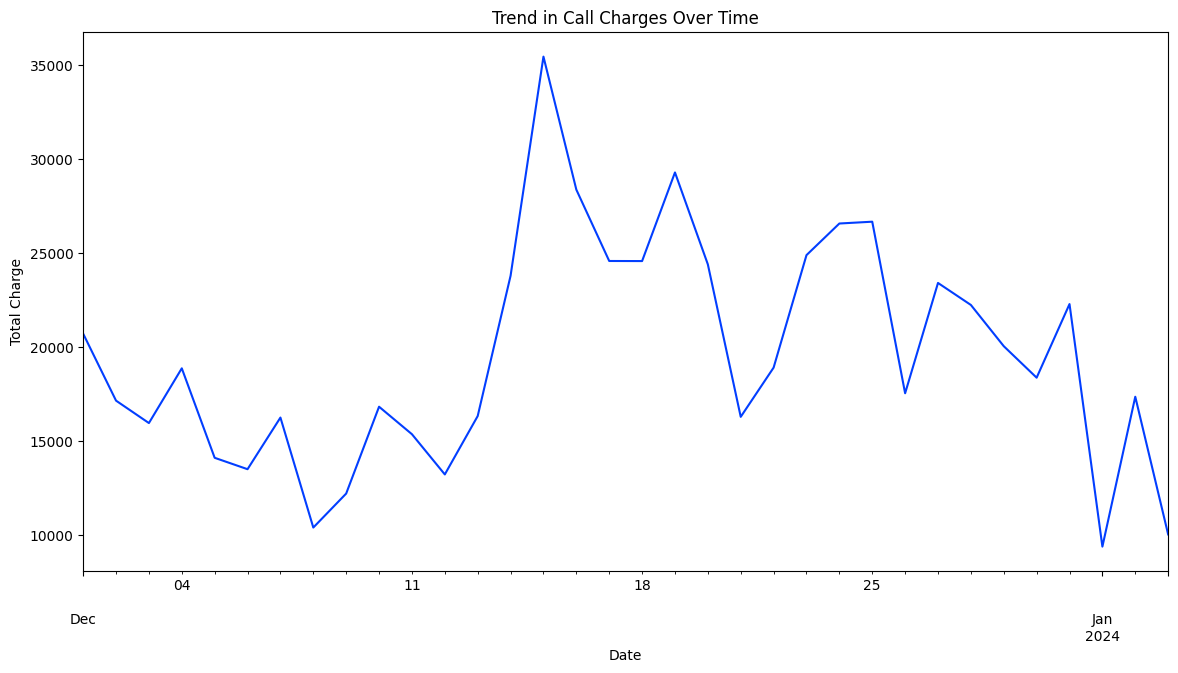

In [24]:
df['createdAt'] = pd.to_datetime(df['createdAt'])
df.set_index('createdAt', inplace=True)

plt.figure(figsize=(14, 7))
df['amount'].resample('D').sum().plot()
plt.title('Trend in Call Charges Over Time')
plt.xlabel('Date')
plt.ylabel('Total Charge')
plt.show()

### Scatter plot to analyze the relationship between TalkTime and UserSpend

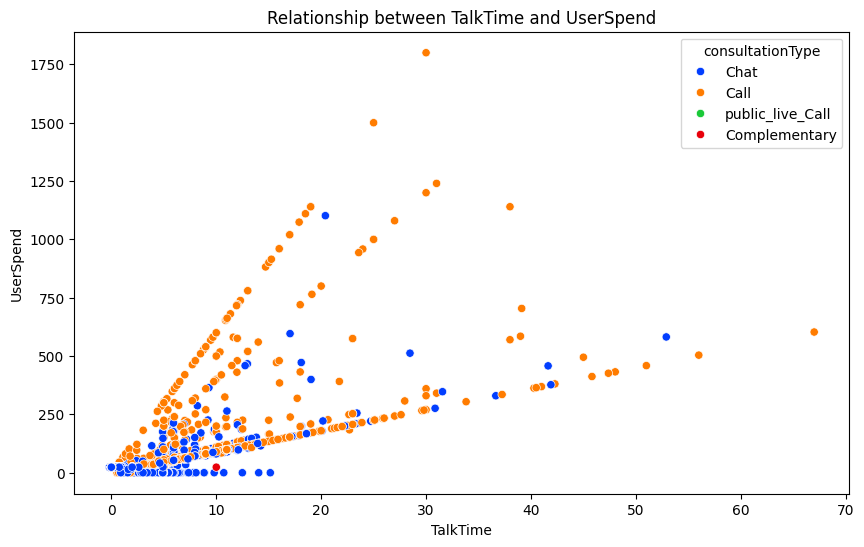

In [25]:
plt.figure(figsize=(10, 6))
sns.set_palette("bright")
sns.scatterplot(x=df['timeDuration'], y=df['amount'], hue=df['consultationType'])
plt.title('Relationship between TalkTime and UserSpend')
plt.xlabel('TalkTime')
plt.ylabel('UserSpend')
plt.show()


## Distribution of chatSeconds

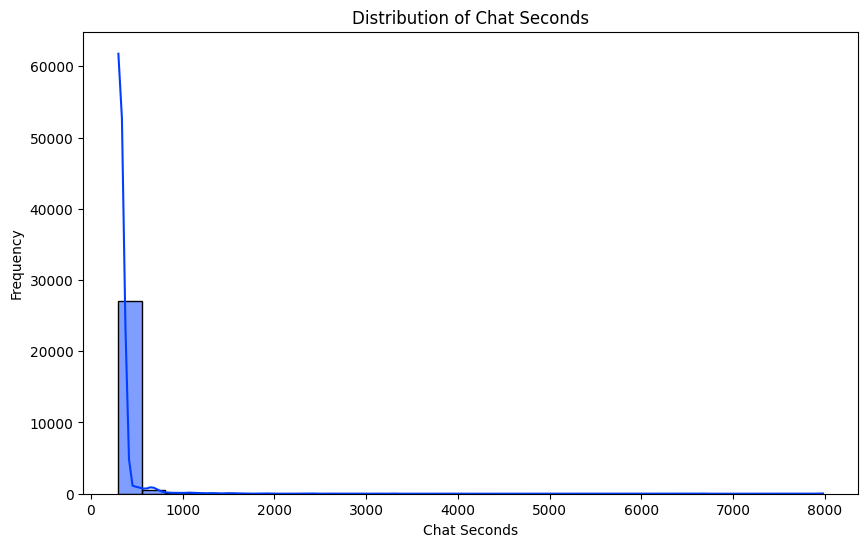

In [26]:
plt.figure(figsize=(10, 6))
sns.set_palette("bright")
sns.histplot(x=df['chatSeconds'], bins=30, kde=True)
plt.title('Distribution of Chat Seconds')
plt.xlabel('Chat Seconds')
plt.ylabel('Frequency')
plt.show()

## Average amount per consultationType

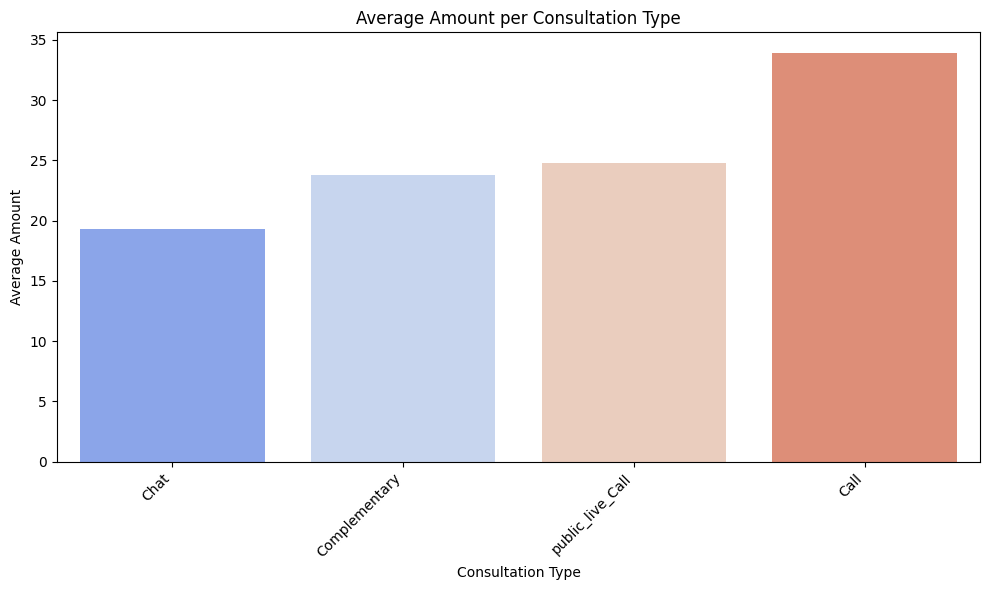

In [27]:
avg_amount_per_consultation = df.groupby('consultationType')['amount'].mean().sort_values().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="consultationType", y="amount", data=avg_amount_per_consultation, palette="coolwarm")
plt.title('Average Amount per Consultation Type')
plt.xlabel('Consultation Type')
plt.ylabel('Average Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Distribution of timeDuration

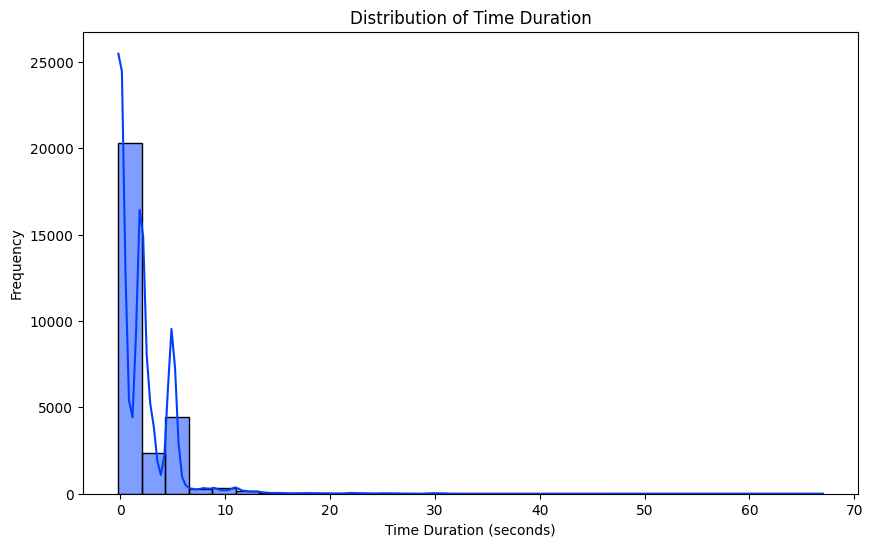

In [28]:
plt.figure(figsize=(10, 6))
sns.set_palette("bright")
sns.histplot(df['timeDuration'], bins=30, kde=True)
plt.title('Distribution of Time Duration')
plt.xlabel('Time Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

## Distribution of amount by website

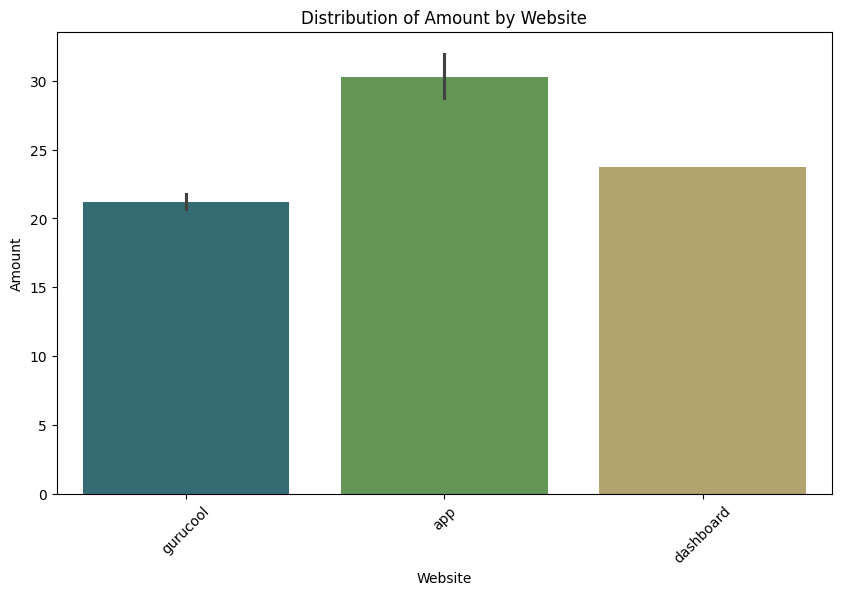

In [29]:
plt.figure(figsize=(10, 6))
sns.set_palette("bright")
sns.barplot(x='website', y='amount', data=df, palette="gist_earth")
plt.title('Distribution of Amount by Website')
plt.xlabel('Website')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

## Heatmap of correlations among key numeric columns

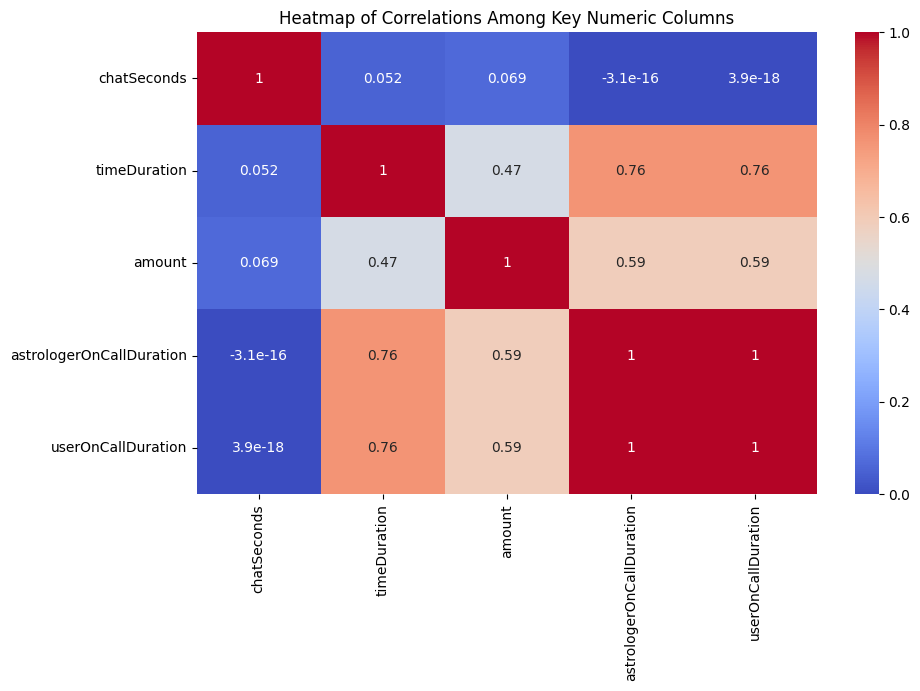

In [30]:
plt.figure(figsize=(10, 6))
corr_matrix = df[key_numeric_columns].corr()
sns.set_palette("bright")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations Among Key Numeric Columns')
plt.show()

## Top 10 Active Users

In [31]:
# Top 10 Active Users
active_users = df.groupby("uid")["userOnCallDuration"].sum().sort_values(ascending=False)[:10]
print(active_users)

uid
33017    91313.937238
26447    40183.987448
17696    27416.784818
22203    23801.569635
33832    23165.569635
21510    19691.784818
30542    16629.874477
28098    16262.911536
19662    14078.924088
35554    13928.708906
Name: userOnCallDuration, dtype: float64


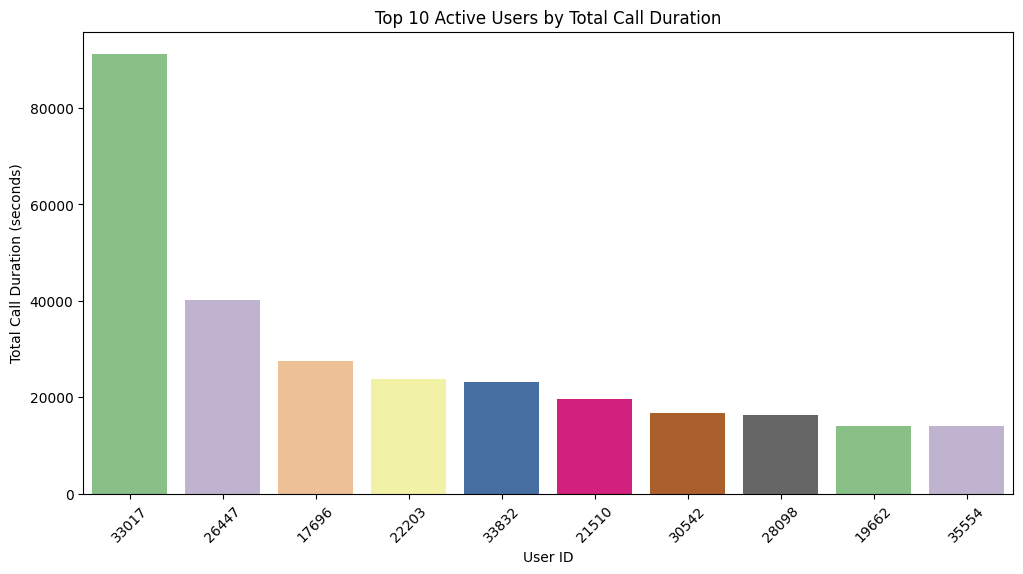

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=active_users.index.astype(str), y=active_users, palette='Accent')
plt.xlabel('User ID')
plt.ylabel('Total Call Duration (seconds)')
plt.title('Top 10 Active Users by Total Call Duration')
plt.xticks(rotation=45)
plt.show()

### **Insights**



1.   **User Engagement:** The data shows a significant variation in call durations among the top users. User 33017 stands out with a call duration more than twice that of the second most active user. This suggests that this user is highly engaged, possibly indicating a key role or high demand for their involvement in calls.
2.   **Usage Patterns:** The steep drop from the top user's call duration to the tenth user (82,999 seconds to 12,645 seconds) indicates a skewed distribution where a small number of users contribute a large portion of the total call time. This could point to specific individuals or roles that are central to communication.






## Top 10 users Actively Connected with Astrologer

In [33]:
# Top 10 users Actively Connected with Astrologer
top_users = df.groupby("uid")["guruName"].value_counts().sort_values(ascending=False)[:10].reset_index(name='count')
print(top_users)

     uid        guruName  count
0  11239  Tarot Bee Riya     66
1  28098  Astro Rajesh S     62
2  22203   Astro Shalini     61
3  17696    Dr Balkrisna     57
4  30535   Astro Krishna     43
5  15903     Astro Seema     40
6  26447   Astro Sonam S     39
7  25435     Tarot Gargi     35
8  28285   Astro Krishaa     35
9  26779   Astro Krishaa     34


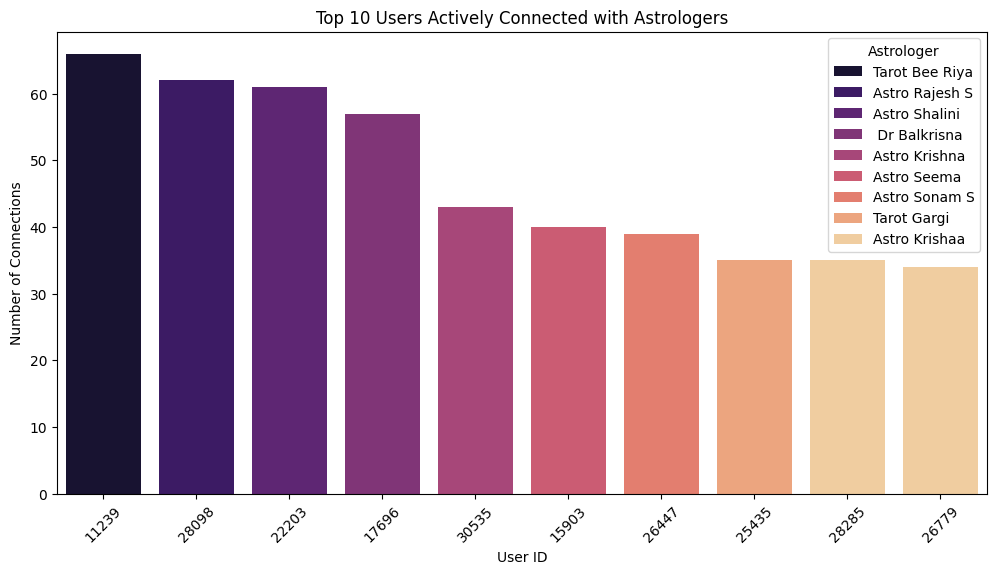

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users['uid'].astype(str), y=top_users['count'], hue=top_users['guruName'], dodge=False, palette='magma')
plt.xlabel('User ID')
plt.ylabel('Number of Connections')
plt.title('Top 10 Users Actively Connected with Astrologers')
plt.xticks(rotation=45)
plt.legend(title='Astrologer')
plt.show()

## **Insights**


1.   User 11239 has the highest number of connections with Tarot Bee Riya.
2.   Engagement Levels: Users like 28098 and 22203 show high engagement levels, which could be indicative of ongoing consultations or strong satisfaction with their chosen astrologers.
3. User Preferences: The distinct bars indicate strong individual preferences for specific astrologers, emphasizing the importance of maintaining these relationships.



## Top 10 Astrologer They Active on Call

In [35]:
# Top 10 Astrologer They Active on Call
top_gids = df[df["astrologerCallStatus"] == "completed"].groupby("gid")["astrologerOnCallDuration"].sum().sort_values(ascending=False)[:10]

gid_to_guruName = df.drop_duplicates(subset="gid")[["gid", "guruName"]].set_index("gid")

top_active_astrologer = top_gids.to_frame().join(gid_to_guruName).reset_index()
print(top_active_astrologer)

   gid  astrologerOnCallDuration             guruName
0  256             165081.543096        Astro Shalini
1   19              91756.933413   Astro Dr Balkrisna
2  257              74798.907472          Astro Divya
3   75              72666.998565         Astro  Ruchi
4  281              61045.847221  Tarot Gurpreet Kaur
5  292              57579.050448          Tarot Gauri
6  287              56906.621518        Astro Krishaa
7  294              52622.299223          Tarot  Ari 
8  271              51017.095995        Astro Sonam S
9  288              50064.634190          Astro Seema


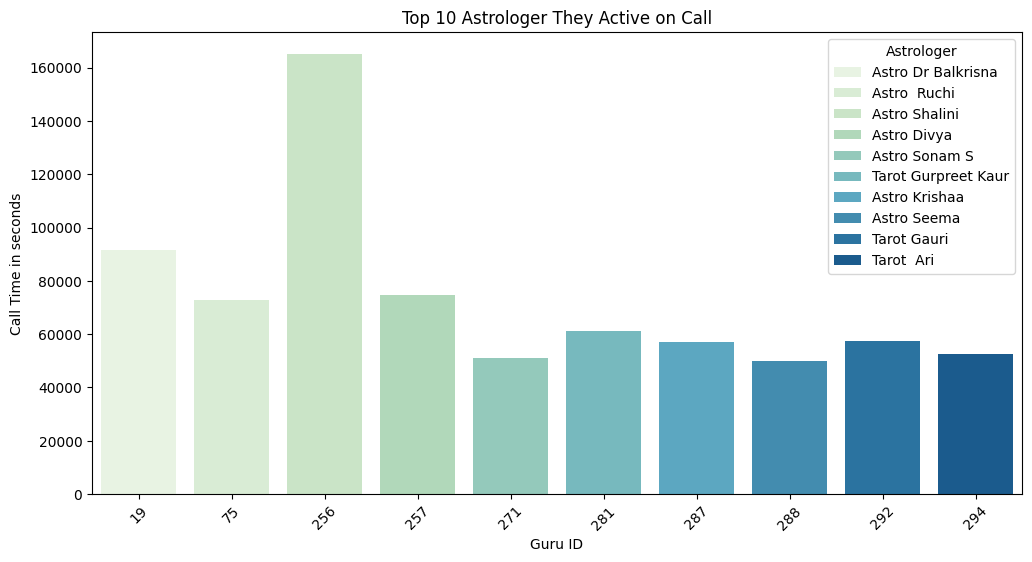

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='gid', y='astrologerOnCallDuration', hue='guruName', data=top_active_astrologer, dodge=False, palette='GnBu')
plt.xlabel('Guru ID')
plt.ylabel('Call Time in seconds')
plt.title('Top 10 Astrologer They Active on Call')
plt.xticks(rotation=45)
plt.legend(title='Astrologer')
plt.show()

## Top Earning Astrologers

In [37]:
# Top Earning Astrologers
top_earning = df.groupby("gid")["astrologersEarnings"].sum().sort_values(ascending=False)[:10]

gid_to_guruName = df.drop_duplicates(subset="gid")[["gid", "guruName"]].set_index("gid")

result = top_earning.to_frame().join(gid_to_guruName).reset_index()
print(result)

   gid  astrologersEarnings             guruName
0   19         18458.541667   Astro Dr Balkrisna
1   75         10274.658333         Astro  Ruchi
2  256          6807.606667        Astro Shalini
3  257          3696.985333          Astro Divya
4  294          2999.492000          Tarot  Ari 
5  271          2907.494667        Astro Sonam S
6   30          2870.266667          Usha Siingh
7  288          2690.817333          Astro Seema
8  281          2688.473333  Tarot Gurpreet Kaur
9  261          2412.510000         Tarot Rupika


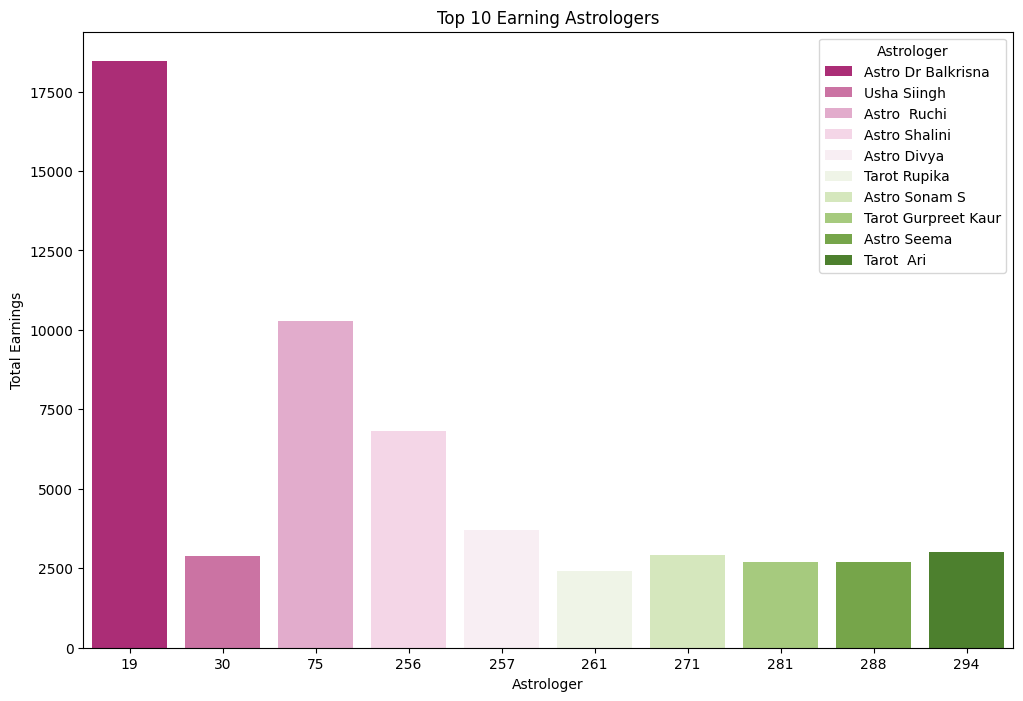

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x="gid", y="astrologersEarnings", hue="guruName", data=result, palette="PiYG")
plt.ylabel('Total Earnings')
plt.xlabel('Astrologer')
plt.title('Top 10 Earning Astrologers')
plt.legend(title='Astrologer')
plt.show()

## Most Astrologer Earning Platform

In [39]:
# Most Astrologer Earning Platform
earnings_by_consultation = df.groupby("consultationType")["astrologersEarnings"].sum().sort_values(ascending=False).reset_index()
print(earnings_by_consultation)

   consultationType  astrologersEarnings
0              Call         77799.439833
1              Chat         21338.641500
2  public_live_Call             8.489617
3     Complementary             0.000000


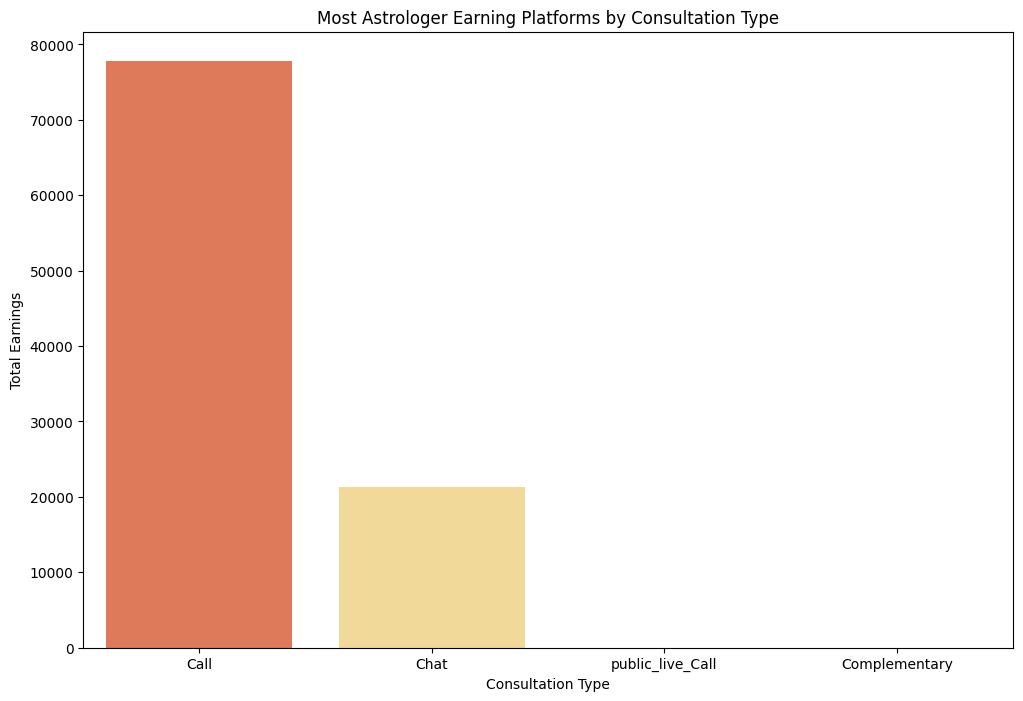

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(y="astrologersEarnings", x="consultationType", data=earnings_by_consultation, palette="RdYlGn")
plt.ylabel('Total Earnings')
plt.xlabel('Consultation Type')
plt.title('Most Astrologer Earning Platforms by Consultation Type')
plt.show()

## Most Spending User On Particular Platform

In [41]:
# Most Spending User On Particular Platform
spending_by_consultation = df.groupby("consultationType")["amount"].sum().sort_values(ascending=False).reset_index()
print(spending_by_consultation)

   consultationType         amount
0              Chat  376708.002588
1              Call  288612.157315
2  public_live_Call      74.339890
3     Complementary      47.485781


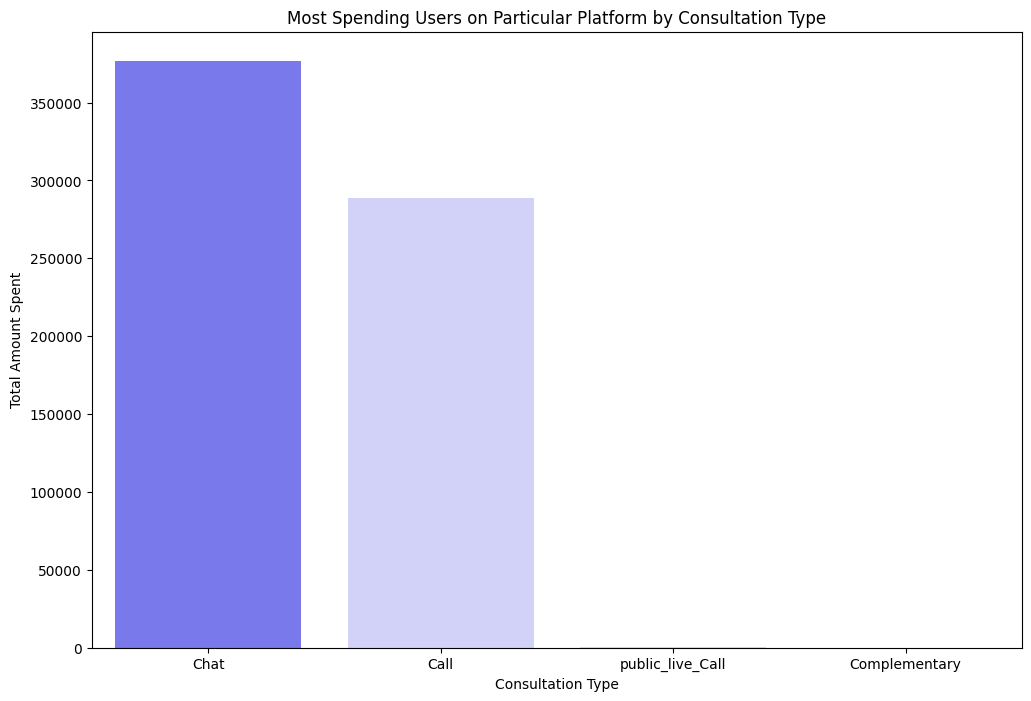

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x="consultationType", y="amount", data=spending_by_consultation, palette="bwr")
plt.xlabel('Consultation Type')
plt.ylabel('Total Amount Spent')
plt.title('Most Spending Users on Particular Platform by Consultation Type')
plt.show()

## Successfully Completed Connections by Website


In [43]:
# Successfully Connection Completed on which website
completed_connections = df[df["callStatus"] == "completed"]["website"].value_counts().reset_index()
completed_connections.columns = ['website', 'count']
print(completed_connections)

     website  count
0        app   3126
1   gurucool    326
2  dashboard      1


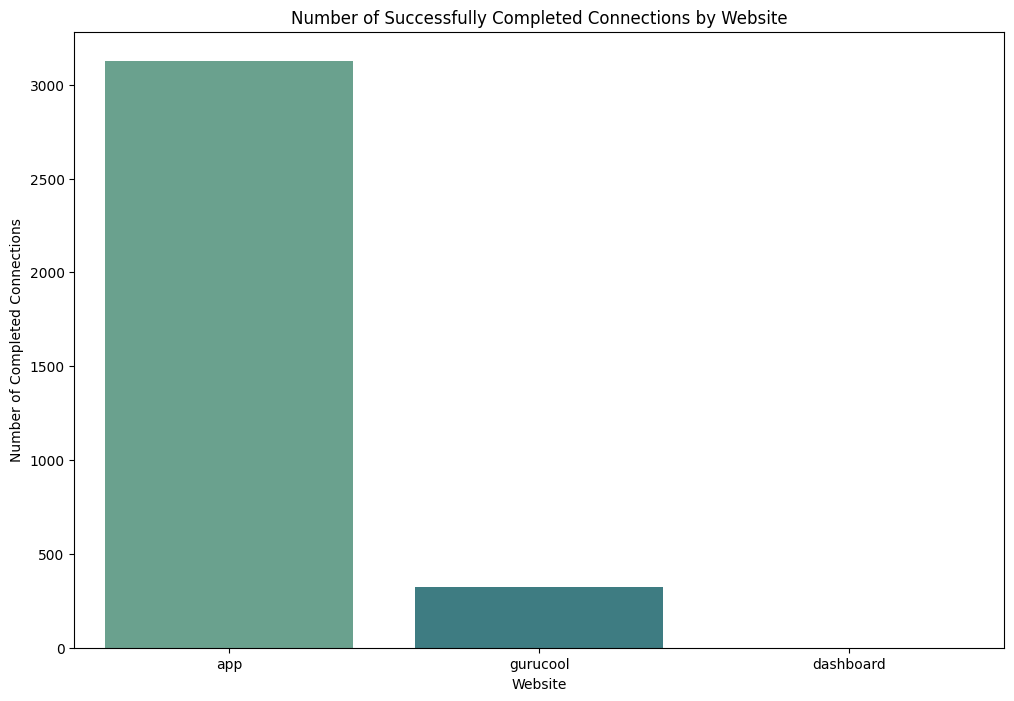

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(y="count", x="website", data=completed_connections, palette="crest")
plt.ylabel('Number of Completed Connections')
plt.xlabel('Website')
plt.title('Number of Successfully Completed Connections by Website')
plt.show()